# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2022/)    
## 1MS041, 2022 
&copy;2022 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

## Second notebook on Random variables

Lets take a look again at the spam dataset and look at our concepts there

In [1]:
from Utils import load_sms
sms_data = load_sms()
sms_data[:2]

[('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
  0),
 ('Ok lar... Joking wif u oni...', 0)]

Let X represents each SMS text (an entry in the list), and let $Y$ represent whether text is spam or not i.e. $Y \in \{0,1\}$. Thus $\mathbb{P}(Y = 1)$ is the probability that we get a spam. The goal is to estimate:
$$
    \mathbb{P}(Y = 1 | \text{"free" or "prize" is in } X) \enspace .
$$
That is, the probability that the SMS is spam given that "free" or "prize" occurs in the SMS. 
Hint: it is good to remove the upper/lower case of words so that we can also find "Free" and "Prize"; this can be done with `text.lower()` if `text` a string.

To do this we can create a new random variable $Z$ which is $1$ if "free" or "prize" appears in $X$.

In [2]:
interesting_words=set(['free','prize'])
TF10 = {True: 1, False: 0}
Z_obs = [TF10[not interesting_words.isdisjoint([word.lower() for word in line[0].split(' ')])] for line in sms_data]

In [3]:
Z_obs[:10]

[0, 0, 1, 0, 0, 0, 0, 0, 1, 1]

In [4]:
Y_obs = [y for x,y in sms_data]
Y_obs[:10]

[0, 0, 1, 0, 0, 1, 0, 0, 1, 1]

In [5]:
import numpy as np
def F_X_12(x):
    TF10 = {True: 1, False: 0}
    return np.mean([TF10[(x1 <= x[0]) and (x2 <= x[1])] for x1,x2 in zip (Y_obs,Z_obs)])

This is the JDF for this problem

In [6]:
print("\t\tz2 <= 0 \tz2 <= 1")
for x1 in range(0,2):
    print("y1 <= %d \t" % x1,end='')
    for x2 in range(0,2):
        print("%.2f" % (F_X_12((x1,x2))),end='\t\t')
    print('\n')

		z2 <= 0 	z2 <= 1
y1 <= 0 	0.86		0.87		

y1 <= 1 	0.96		1.00		



In [7]:
F_X_12((1,0))

0.9551328068916008

In [8]:
F_X_12((0,0)) == F_X_12((0,1))*F_X_12((1,0))

False

In [9]:
F_X_12((0,1))*F_X_12((1,0))

0.8270846721557743

In [10]:
# Are they indepdentent? If so, then the JDF is just the product of the 
# DFs for Y and Z, but
0.865936826992103*0.955132806891601

0.827084672155774

Which is not 0.858, so they are not independent. So lets try to estimate the probability that $Y=1$ given that $Z = 1$. Lets again do that by filtering

In [11]:
np.mean([y for z,y in zip(Z_obs,Y_obs) if z == 1])

0.812

Compare that with the marginal probability of $Y = 1$, which is according to our JDF 1-0.866 = 0.134

In [12]:
# Or we can just compute it directly
np.mean(Y_obs)

0.13406317300789664

What we see from this is that knowing that the words "free" or "prize" appeared in the sms text, we are much more certain that it is a spam. We also see that looking directly at the JDF this can be hard to see, although it is equivalent.

## Moments etc

In [13]:
import numpy as np
x = np.random.normal(size=100)

In [14]:
x

array([-0.35371553,  0.60520867,  0.95752428,  3.37462514, -1.6456341 ,
        0.50646886, -1.53608708, -2.46091513, -0.8106167 ,  1.75525451,
       -0.84007373, -0.28807306, -0.39918635,  0.96661723,  1.00758687,
       -1.54311366, -0.40475095, -1.66354664,  0.22859209, -0.27541867,
       -2.06294285,  0.11374775, -0.81776294, -1.14579214,  0.66025072,
        0.52027236, -1.26199837, -0.97778546,  0.20371888,  0.05248344,
       -1.05291303, -1.7479115 ,  0.54721559, -1.18789198,  0.20612371,
       -0.39132218,  1.27602507,  0.09835566,  0.81199058,  1.1894242 ,
        0.47104623, -1.06824709,  0.24305561, -0.4954679 ,  0.86154465,
        1.05316607, -0.16132349, -2.22261199, -1.52043169, -1.41575372,
       -1.22632408,  0.00401775, -0.29078247,  1.08836149, -1.16023075,
        1.03823823, -0.07646855, -0.17208857,  0.88318148, -0.07631615,
       -0.20370798,  0.47677254,  1.6443833 ,  0.67417505, -1.05668609,
       -0.01307616, -0.26849532,  0.57272889,  1.35516319,  0.09

## Sample mean

In [15]:
np.mean(x)

-0.06443572989592

## Sample variance

In [16]:
np.var(x)

1.1844467408798631

Or by doing it yourself

In [17]:
mu = np.mean(x)
np.mean(np.power(x-mu,2))

1.1844467408798631

Higher moments, we can use `scipy`

In [18]:
from scipy.stats import skew, kurtosis

In [19]:
skew(x)

0.23624304439826657

In [20]:
kurtosis(x,fisher=False)

2.9059196099377136

## Moments and tail behavior

In [21]:
def standardize(data):
    mean = np.mean(data)
    std = np.sqrt(np.var(data))
    return (data-mean)/std

(-3.0, 5.0)

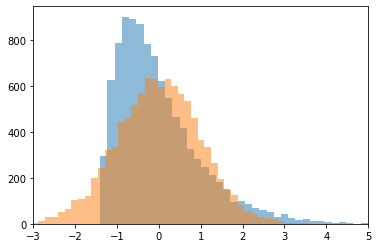

In [22]:
import numpy as np
chi2 = np.random.chisquare(4,size=10000)
normal = np.random.normal(size=10000)
import matplotlib.pyplot as plt
_=plt.hist(standardize(chi2),bins=50,alpha=0.5)
_=plt.hist(standardize(normal),bins=50,alpha=0.5)
plt.xlim(-3,5)

In [23]:
from scipy.stats import skew, kurtosis
def print_basic_stats(data):
    print("mean: %.2f\tstd: %.2f\tskew: %.2f\tkurtosis: %.2f" % (np.mean(data),np.std(data),skew(data),kurtosis(data,fisher=False)))

In [24]:
print_basic_stats(normal)

mean: 0.00	std: 0.99	skew: 0.00	kurtosis: 3.06


In [25]:
print_basic_stats(chi2)

mean: 4.02	std: 2.84	skew: 1.38	kurtosis: 5.66


In [26]:
print_basic_stats(standardize(np.sqrt(chi2)))

mean: -0.00	std: 1.00	skew: 0.40	kurtosis: 3.02


In [27]:
np.mean(np.power(standardize(chi2),3)) # Skewness

1.37523581367624

In [28]:
np.mean(np.power(standardize(chi2),4)) # kurtosis

5.658929943872248

## Transformations of random variables

Consider a Binomial random variable

In [29]:
n = 10
p = 0.5
x = np.random.binomial(n,p,size=1000)

Lets plot the empirical density

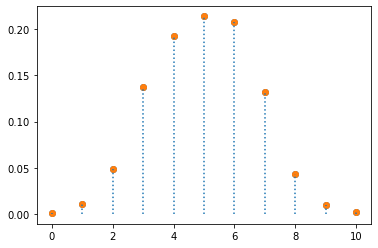

In [30]:
from Utils import makeEMF,plotEDF,plotEMF
plotEMF(makeEMF(x))

If we had the function $g(x) = \sin(x/3)$

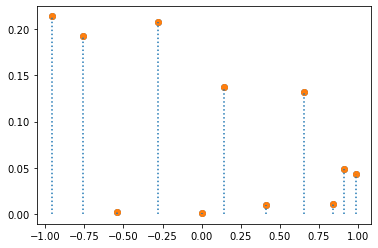

In [31]:
plotEMF(makeEMF(np.sin(x)))

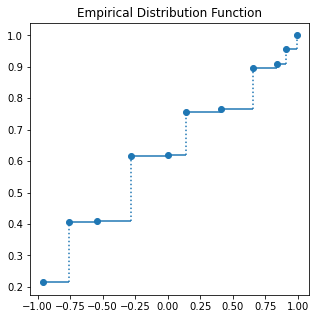

In [32]:
plotEDF(makeEMF(np.sin(x)))

Can we compute this thing?
What is $\sin^{[-1]}$?

Since $X$ is discrete, we can check what $\mathbb{Y}$ is, since $\mathbb{X}=\{0,1,\ldots,10\}$.

In [33]:
Y_space = np.sort(np.sin(np.arange(0,11)))
sin_inv = dict(zip(np.sin(np.arange(0,11)),np.arange(0,11)))

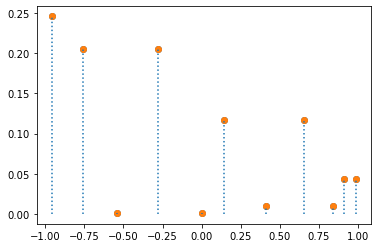

In [34]:
from scipy.special import binom as binomial
plotEMF([(y,binomial(n,sin_inv[y])*(p**sin_inv[y])*((1-p)**(n-sin_inv[y]))) for y in Y_space])

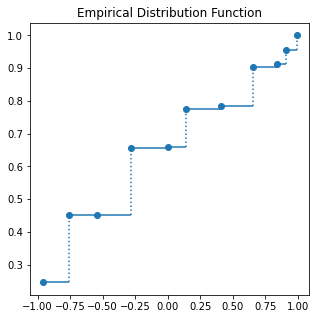

In [35]:
plotEDF([(y,binomial(n,sin_inv[y])*(p**sin_inv[y])*((1-p)**(n-sin_inv[y]))) for y in Y_space])